<a href="https://colab.research.google.com/github/Francesco-Castellani/Tarea-2/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [1]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [3]:
# Haga el cálculo aquí
horas=0.5*3.6*1e6  #cantidad de horas que tengo
print(horas)
dias=horas/24   #Calculamos los días en base a las horas diviendo por 24
print(dias)
años=dias/365   #Calculamos los años diviendo los días por 365
print(años)

#Por lo tanto, se necesitarían 206 años (pues exactamente serían 205,479 años; pero en cantidades enteras se necesitarían 206).

1800000.0
75000.0
205.4794520547945


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [4]:
path_archivo = 'https://raw.githubusercontent.com/Francesco-Castellani/Tarea-2/main/ngc5694_pm.csv'
data=pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [5]:
# Muestra las columnas aquí
print(data.columns)


Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')


In [6]:
# Muestra el DataFrame aquí
print(data)

     Unnamed: 0          ra        dec      pmra     pmdec
0             0  219.370629 -27.312548  0.053134 -1.674613
1             1  219.373996 -27.243801 -0.960711 -0.283708
2             2  219.363458 -27.213113  0.674957 -1.741153
3             3  219.336931 -27.172985 -0.057975 -0.564131
4             4  219.463706 -27.189408 -0.438914 -0.487856
..          ...         ...        ...       ...       ...
616         616  220.732855 -26.148055 -0.269935 -0.891652
617         617  220.710525 -26.150902 -0.962554 -0.400258
618         618  219.327652 -27.267281 -0.796753 -0.266571
619         619  219.225796 -27.172318 -0.901963 -0.302597
620         620  219.162241 -27.121378  0.059221 -1.300554

[621 rows x 5 columns]


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [10]:
pmra = data['pmra']
pmdec = data['pmdec']
#Accedemos a los datos solicitados desde la data ocupando las llaves, y simplemente las guardamos en una variable.

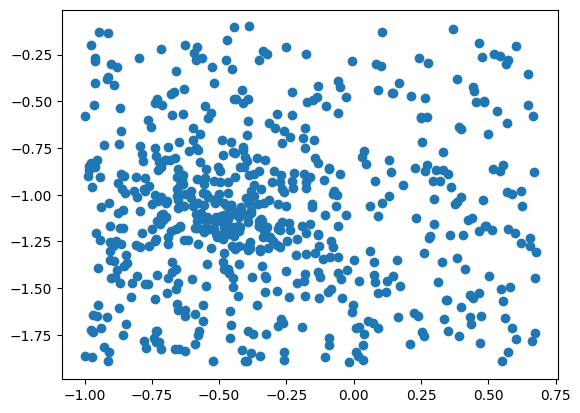

In [11]:
# Haga el gráfico en esta celda
plt.scatter(pmra,pmdec)   #Simplemente ocupamos el scatter para generar la dispersión

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [13]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

# .mean y .std, son funciones propias de python que se extraen del math; mean= promedio, std= desviación estándar.

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

# Hacemos las funciones descritas dos veces, una por cada variable.

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [15]:
from scipy.stats import norm

x_pmra = np.linspace(-1.5,1,300)    #Arreglo de 300 números entre (-1.5,1)
fx_pmra = norm.pdf(x_pmra,mu_pmra,std_pmra) #F(x) generada con norm y las variables anteriores para pmra

x_pmdec = np.linspace(-2.5,0.5,300)   #Arreglo de 300 números entre (-2.5,0.5)
fx_pmdec = norm.pdf(x_pmdec,mu_pmdec,std_pmdec) #F(x) generada con norm y las variables anteriores para pmdec

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

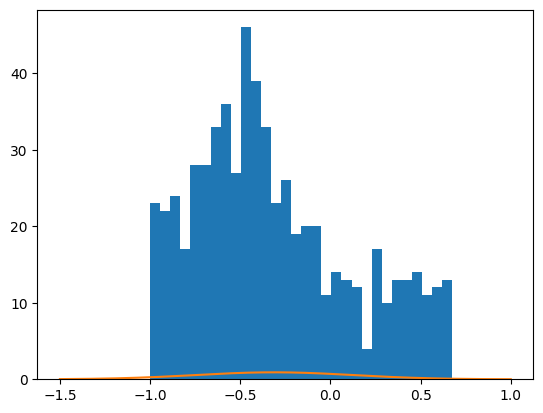

In [19]:
plt.hist(pmra,bins=30)  #Función de Matplotlib que genera un histograma directamente
plt.plot(x_pmra,fx_pmra)  #Ploteo la Gaussiana con ayuda de fx


Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

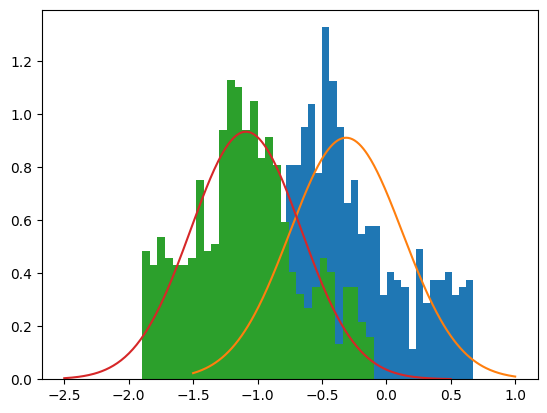

In [21]:
plt.hist(pmra,bins=30,density=True)
plt.plot(x_pmra,fx_pmra)
plt.hist(pmdec,bins=30,density=True)
plt.plot(x_pmdec,fx_pmdec)
#Repetimos la gráfica pero, añadimos el histograma de pmdec y la modificación density

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

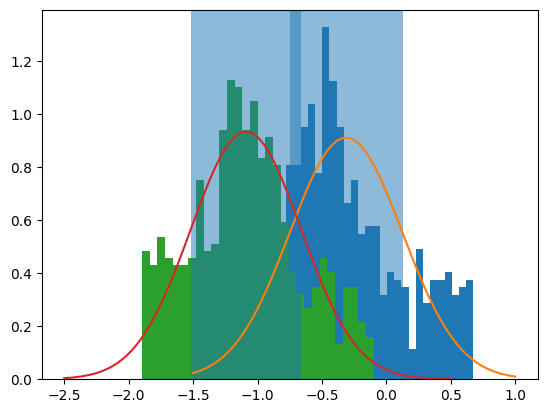

In [24]:
plt.hist(pmra,bins=30,density=True)
plt.plot(x_pmra,fx_pmra)
plt.axvspan(mu_pmra-std_pmra,mu_pmra+std_pmra, alpha=0.5)  #Alpha es la palidéz de la franja para que se notase en la gráfica.
plt.hist(pmdec,bins=30,density=True)
plt.plot(x_pmdec,fx_pmdec)
plt.axvspan(mu_pmdec-std_pmdec,mu_pmdec+std_pmdec, alpha=0.5)

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Como pmra está descrito bajo la curva naranja, notamos que su estimación es aproximadamente -0.6, en cambio para pmdec, cual se describe bajo la curva roja, su estimación es aproximadamente -1.4, para el cúmulo globular.

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [25]:
# Lea y muestre el DataFrame aquí
data = pd.read_csv('https://raw.githubusercontent.com/Francesco-Castellani/Tarea-2/main/data_spectra.csv')
print(data)


      Unnamed: 0          Wlth     obs_1     obs_2     obs_3     obs_4  \
0              0  13893.158801  0.673065  1.048759  1.135927  1.365672   
1              1  13894.381791  1.218438  1.384774  0.647763  1.286700   
2              2  13895.604780  1.244496  0.775893  1.213005  0.898531   
3              3  13896.827769  1.395414  0.853016  0.929927  0.617134   
4              4  13898.050759  1.013531  0.891468  1.125626  1.354080   
...          ...           ...       ...       ...       ...       ...   
1415        1415  15623.688705  0.693123  1.222298  1.249391  1.105946   
1416        1416  15624.911694  1.387281  1.332809  1.151107  1.254744   
1417        1417  15626.134683  1.208096  0.914692  0.874394  1.083929   
1418        1418  15627.357673  1.167845  1.261191  1.306496  0.945764   
1419        1419  15628.580662  0.624966  0.760200  1.208771  0.668682   

         obs_5     obs_6     obs_7     obs_8  ...    obs_11    obs_12  \
0     1.205216  0.777480  0.777436  0.

### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:**

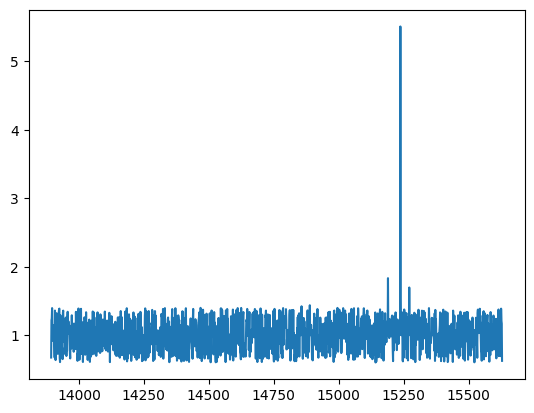

In [26]:
# Grafique aquí
plt.plot(data['Wlth'],data['obs_1'])  #Accedemos a las columnas directamente desde la variable data.

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Calcular el promedio de lo observado en 1, y restárselo a la variable íntegra, obteniendo una ecuación del estilo:

data[obs_1] - data[obs_1].mean

Y graficándolo con respecto al mismo wlth para mantener la consistencia de los datos.

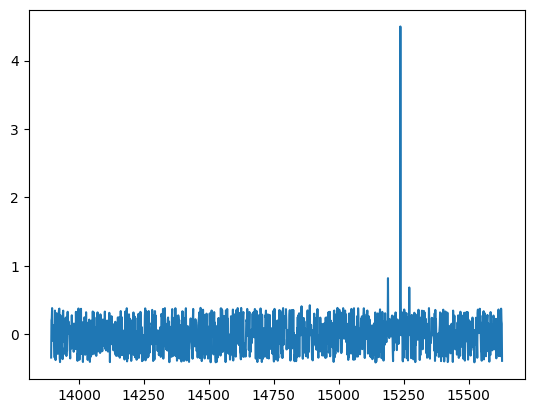

In [40]:
# Grafique el espectro centrado en 0 aquí
plt.plot(data['Wlth'],data['obs_1']-data['obs_1'].mean())

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [27]:
std_obs_1 = data['obs_1'].std()  #guardamos la desviación estándar en una variable ocupando el ".std"
mean_obs_1 = data['obs_1'].mean()  #guardamos el promedio en una variable ocupando el ".mean"
ruido = data['obs_1'][(data['obs_1'] >= mean_obs_1 - 3*std_obs_1) & (data['obs_1'] <= mean_obs_1 + 3*std_obs_1)]   #Subconjunto de ruido que cumple con el margen pedido

2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

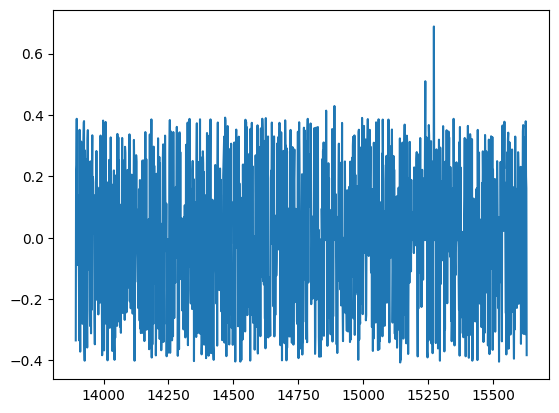

In [28]:
# Grafique el espectro centrado en 0 aquí
ruido = ruido - ruido.mean()  #restamos el promedio para centrar en 0
plt.plot(data['Wlth'][ruido.index],ruido)

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:**

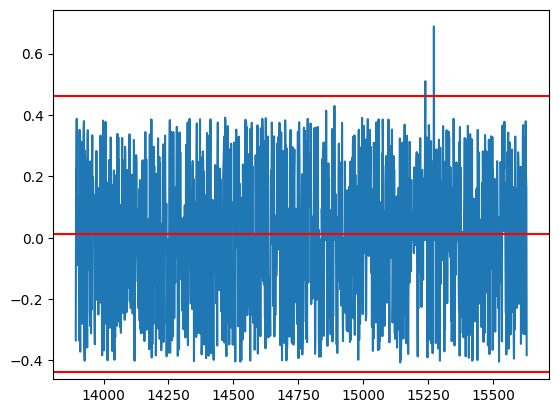

In [29]:
std_ruido = ruido.std()
plt.plot(data['Wlth'][ruido.index],ruido)
plt.axhline(y=mean_obs_1-1,color='r')  #Linea que usé de referencia para guiarme
plt.axhline(y=mean_obs_1-1-2*std_ruido,color='r')
plt.axhline(y=mean_obs_1-1+2*std_ruido,color='r')   # n=2 es adecuado para describir los márgenes del ruido

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [30]:
for i in range(1,7):
  data['obs_'+str(i)] = data['obs_'+str(i)] - data['obs_'+str(i)].mean()

2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [31]:
std_obs_1 = data['obs_1'].std()
sigma = [std_obs_1]
for i in range(2,7):
  data['obs_all'] = (data['obs_1']+data['obs_'+str(i)])/2
  sigma.append(data['obs_all'].std())


 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:**

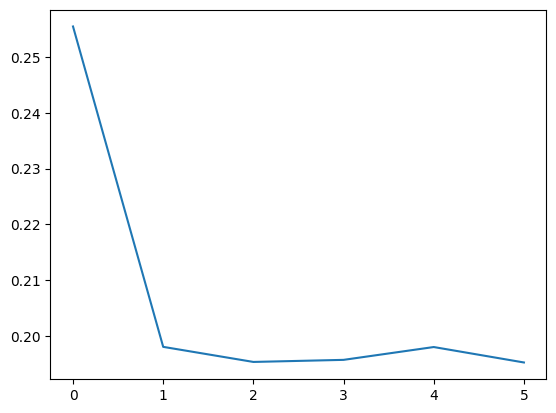

In [32]:
plt.plot(sigma)

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** 1, igual que en la anterior, se debe a la consistencia de los datos en cuanto información, pues cada vez que se va actualizando el sigma calculado se adapta a la cantidad de variables que se le está sumando, generando el mismo ruido centrado en el cero.

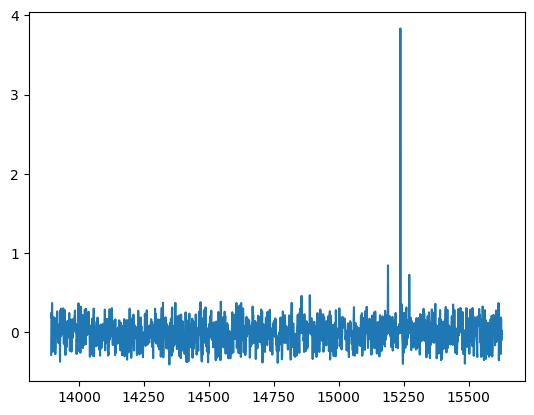

In [33]:
plt.plot(data['Wlth'],data['obs_all'])